# Featured Activity 1: Linear Model.

#### Loading required libraries

In [1]:
library(readxl)
library(ggplot2)

#### Reading data

In [2]:
data <- read_excel("NHLTop100.xlsx")

#### Taking required data into data frame

In [3]:
df <- data.frame(G=data$G, A=data$A)
df <- rbind(df, c(284,460))

#### Calculating various lm models

In [4]:
#Initial fit
original = lm(A~G, data = df)

#Initial fit through 0
original0 = lm(A~G+0, data = df)

#Fit through Wayne Gretzky
model1 = lm(I(A-1963)~I(G-894)+0,data = df)

#Fit through Wayne Gretzky and origin
model10 = (lm(A+368~G+0, data = df))

#Fit through Patrick Kane
model2 = lm(I(A-460)~I(G-284)+0,data = df)

#Fit through Patrick Kane and origin
model20 = (lm(A+78~G+0, data = df))

#### Plotting lines for all lm models

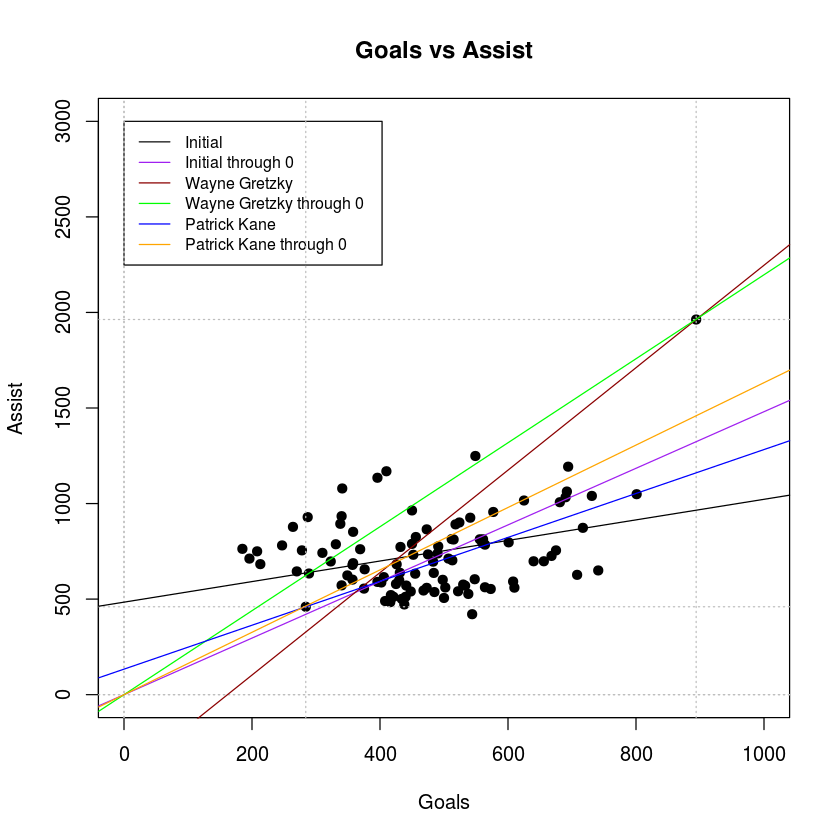

In [5]:
plot(A ~ G, data=df, main="Goals vs Assist", pch = 19, xlim = c(0,1000), ylim = c(0,3000), xlab = "Goals", ylab = "Assist")
legend(0, 3000, legend=c("Initial", "Initial through 0","Wayne Gretzky","Wayne Gretzky through 0","Patrick Kane","Patrick Kane through 0"),col=c("black", "purple","darkred","green","blue","orange"), lty=1, cex=0.8)
abline(h=c(0,1963),v=c(0,894),lty=3,col="gray")
abline(h=c(0,460),v=c(0,284),lty=3,col="gray")
abline(original, col="black")
abline(original0, col="purple")
abline(predict(model1, newdata = list(G=0))+1963, coef(model1), col='darkred')
abline(model10, col='green')
abline(predict(model2, newdata = list(G=0))+460, coef(model2), col='blue')
abline(model20, col='orange')

<b>Summarising R<sup>2</sup> and P values</b>

#### Function to get R-squared and P-value from model

In [6]:
lmp <- function (modelobject) {
    if (class(modelobject) != "lm") stop("Not an object of class 'lm' ")
    f R-squared and P-value <- summary(modelobject)$fstatistic
    r <- summary(modelobject)$r.squared
    p <- pf(f[1],f[2],f[3],lower.tail=F)
    attributes(p) <- NULL
    df <- c(r, p)
    return(df)
}


#### Calculating  R-squared and P-value values for various models

In [7]:
original_val <- lmp(original)
original0_val <- lmp(original0)
model1_val <- lmp(model1)
model10_val <- lmp(model10)
model2_val <- lmp(model2)
model20_val <- lmp(model20)

In [20]:
final_values <- NULL
final_values <- rbind(final_values,original_val)
final_values <- rbind(final_values,original0_val)
final_values <- rbind(final_values,model1_val)
final_values <- rbind(final_values,model10_val)
final_values <- rbind(final_values,model2_val)
final_values <- rbind(final_values,model20_val)
colnames(final_values) <- c("R-squared","P-value")
rownames(final_values) <- c("Initial", "Initial through 0","Wayne Gretzky","Wayne Gretzky through 0","Patrick Kane","Patrick Kane through 0")

In [21]:
(final_values)

,R-squared,P-value
Initial,0.1161363,4.880298e-04
Initial through 0,0.8985194,1.748890e-51
Wayne Gretzky,0.9103465,3.541536e-54
Wayne Gretzky through 0,0.9224792,2.448654e-57
Patrick Kane,0.5788632,1.728544e-20
Patrick Kane through 0,0.9068236,2.437554e-53


<b>
Here we can observe that the values for R-square increase as we pass the original fit through origin<br>
Also the values for P decrease as we pass the original fit through origin<br>
Hence we can see that models that pass through the origin are a better fit than the original ones
</b>